## 手寫數字辨識

### 手寫數字辨識程式碼
```
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Dense(20, input_dim=784, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='mse', optimizer=SGD(learning_rate=0.05), metrics=['accuracy'])

model.fit(x_train, y_train, validation_split=0.2, batch_size=100, epochs=20)

predict = np.argmax(model.predict(x_test), axis=-1)

score = model.evaluate(x_test, y_test)
print('正確率', score[1])

model.save('number.h5')
model.save('/content/drive/MyDrive/Colab Notebooks/number.h5')
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
y_train.shape

(60000,)

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

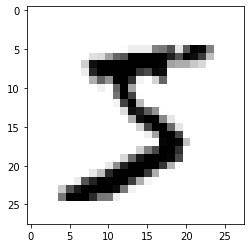

In [12]:
plt.imshow(x_train[0], cmap='binary')

In [13]:
x_train.shape

(60000, 28, 28)

In [18]:
x_train = x_train.reshape(60000, -1)

In [17]:
t2.shape

(60000, 784)

In [20]:
x_test = x_test.reshape(10000, -1)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

## gradio：網頁互動界面

### gradio程式碼
**手寫數字**
```
!pip install gradio

import gradio as gr
import tensorflow

model = tensorflow.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/number.h5")

def mnist(image):
    image = image.reshape(1, 784)
    prediction = model.predict(image).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

grobj = gr.Interface(fn=mnist, inputs="sketchpad", outputs=gr.outputs.Label(num_top_classes=3, label='預測結果'), title="手寫數字")
grobj.launch()
```
**Inception辨識物體**
```
import gradio as gr
import tensorflow
import numpy as np
import requests

model = tensorflow.keras.applications.InceptionV3()

response = requests.get('https://git.io/JJkYN')

labels = response.text.split('\n')

def classify(img):
    img = np.expand_dims(img, 0)
    img = tensorflow.keras.applications.inception_v3.preprocess_input(img)
    prediction = model.predict(img)[0]
    return {labels[i]: float(prediction[i]) for i in range(len(prediction))}

imputs = gr.inputs.Image(shape=(299, 299))

outputs = gr.outputs.Label(num_top_classes=3, label='預測結果')

grobj = gr.Interface(fn=classify, inputs=imputs, outputs=outputs, title='Inception物件偵測')
grobj.launch()
```
**自動歌詞產生器(繁體)** 
```
import gradio as gr
grobj = gr.Interface.load("huggingface/uer/gpt2-chinese-lyric", inputs="text", outputs="text")
grobj.launch()

!pip install opencc
!pip install transformers

import gradio as gr
from opencc import OpenCC
from transformers import BertTokenizer, GPT2LMHeadModel, TextGenerationPipeline

tokenizer = BertTokenizer.from_pretrained("uer/gpt2-chinese-lyric")
model = GPT2LMHeadModel.from_pretrained("uer/gpt2-chinese-lyric")

cc = OpenCC('s2twp')

def lyric(text):
    text_generator = TextGenerationPipeline(model, tokenizer)
    ret = text_generator(text, max_length=100, do_sample=True)
    return cc.convert(ret[0]['generated_text'])
```

### 手寫數字

In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve("https://gr-models.s3-us-west-2.amazonaws.com/mnist-model.h5", "mnist-model.h5")
model = tensorflow.keras.models.load_model("mnist-model.h5")

### Inception辨識物體

In [ ]:
import gradio as gr
import tensorflow
import numpy as np
import requests

### 自動歌詞產生器(繁體)

In [ ]:
grobj = gr.Interface(fn=lyric,inputs="textbox", outputs=gr.outputs.Textbox(), title="自動產生歌詞")
grobj.launch()

## Teachable Machine

### Teachable Machine程式碼
```
import numpy as np
import cv2
from time import sleep
import tensorflow.keras
 
labels = ['cloth','fist','nothing']
current_x = 300
move = 10
model = tensorflow.keras.models.load_model('keras_model.h5')
 
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
while True:
    success, image = cap.read()
    if success == True:
        data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
        image = cv2.flip(image,1) #左右反轉
        img = cv2.resize(image,(224,224))
        img = np.array(img,dtype=np.float32)
        img = np.expand_dims(img,axis=0)
        img = (img/127.0) - 1 #正規化
        data[0] = img
 
        prediction = model.predict(data) #預測
        predicted_class = np.argmax(prediction[0], axis=-1)
        predicted_class_name = labels[predicted_class]
        print(current_x, predicted_class_name)
 
        if predicted_class_name == 'cloth':
            current_x -= move
            if current_x < 0:
                current_x = 0
        elif predicted_class_name == 'fist':
            current_x += move
            if current_x > width:
                current_x = width
        cv2.putText(image, 'O', (current_x,100), cv2.FONT_HERSHEY_PLAIN, 0.4, (255, 0, 0), cv2.LINE_AA)
        cv2.imshow("Frame",image)
        sleep(0.2)
 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
 
cap.release()
cv2.destroyAllWindows()    
```

## cvzone：多媒體機器學習

### cvzone程式碼
```
!pip install cvzone
!pip install mediapipe

#臉部偵測
from cvzone.FaceDetectionModule import FaceDetector
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/person1.jpg')
detector = FaceDetector()
img, bboxs = detector.findFaces(img)
#print('人臉範圍：', bboxs)
cv2_imshow(img)

#臉部特徵網
from cvzone.FaceMeshModule import FaceMeshDetector
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/person1.jpg')
detector = FaceMeshDetector(staticMode=True, maxFaces=5)
img, faces = detector.findFaceMesh(img)
cv2_imshow(img)

#手部偵測
from cvzone.HandTrackingModule import HandDetector
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/hand1.jpg')
detector = HandDetector(mode=False, detectionCon=0.5, maxHands=2)
img = detector.findHands(img)
cv2_imshow(img)

#姿勢偵測
from cvzone.PoseModule import PoseDetector
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/pose1.jpg')
detector = PoseDetector()
img = detector.findPose(img)
cv2_imshow(img)

#手部攝影追踪
from cvzone.HandTrackingModule import HandDetector
import cv2

cap = cv2.VideoCapture(0)
detector = HandDetector()

while True:
    success, img = cap.read()
    img = cv2.flip(img, 1)
    img = detector.findHands(img)
    cv2.imshow("Image", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
```


In [ ]:
#臉部偵測


In [ ]:
#臉部特徵網


In [ ]:
#手部偵測


In [ ]:
#姿勢偵測


In [ ]:
#手部狀態偵測
from cvzone.HandTrackingModule import HandDetector
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/hand1.jpg')
detector = HandDetector(mode=False, detectionCon=0.5)
img = detector.findHands(img)
lmList, bboxInfo = detector.findPosition(img)
#print('特徵點：', lmList)
if lmList:
  bbox = bboxInfo['bbox']
  #左右手
  myHandType = detector.handType() 
  cv2.putText(img, 'Hand:{}'.format(myHandType), (bbox[0], bbox[1]-25), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 2)
  #伸出手指數
  fingers = detector.fingersUp()
  #print(fingers)
  upFingers = fingers.count(1)
  cv2.putText(img, 'Finger:{}'.format(upFingers), (bbox[0]+100, bbox[1]-25), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 0), 2)
  #兩特徵點距離
  distance, img, info = detector.findDistance(8, 12, img) #食指與中指
  cv2.putText(img, 'Dist:{}'.format(str(int(distance))), (bbox[0]+200, bbox[1]-25), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 2)
cv2_imshow(img)